# Human Activity Recognition with Smartphones

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

Reference: [Kaggle URL](https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones)

## Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

## Attribute information

### For each record in the dataset the following is provided:

1. Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.
2. Triaxial Angular velocity from the gyroscope.
3. A 561-feature vector with time and frequency domain variables.
4. Its activity label.
5. An identifier of the subject who carried out the experiment.

## File Information
1. test.csv
2. train.csv

## CRISP Standard
The project will use the CRISP-DM industry standard workflow.

### Business Understanding
NA

### Data Understanding

In [10]:
import numpy as np
import pandas as pd

train = pd.read_csv('../../../../input/human-activity/train.csv')
test  = pd.read_csv('../../../../input/human-activity/test.csv')
train.shape

(7352, 563)

### Data Preparation

#### **Feature Engineering**

##### Tree_based feature selection

The ExtraTreesClassifier class from sklearn package can be used to do the tree based feature selection. As you can esee below the number of features is reduced to 92 from 562.

In [11]:
import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
features = train.iloc[:,0:562]
label = train['Activity']

In [12]:
clf = ExtraTreesClassifier(random_state=1)
clf = clf.fit(features, label)
model = SelectFromModel(clf, prefit=True)
new_features = model.transform(features)
print(new_features.shape)

(7352, 92)


##### L1-Based feature selection
L1-Based feature selection resulted in the number of features reduced to 112 from 562.

In [13]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False, random_state=1).fit(features, label)
model_2 = SelectFromModel(lsvc, prefit=True)
new_features_2 = model_2.transform(features)
print(new_features_2.shape)

(7352, 112)


### Modeling
The models we will use are:

1. DecisionTreeClassifier
2. RandomForestClassifier
3. GradientBoostingClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
Classifiers = [DecisionTreeClassifier(),RandomForestClassifier(n_estimators=200),GradientBoostingClassifier(n_estimators=200)]

#### Base Lines Modeling - No feature Selection

In [15]:
from sklearn.metrics import accuracy_score
import timeit
test_features= test.iloc[:,0:562]
Time_1=[]
Model_1=[]
Out_Accuracy_1=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(features,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_1.append(elapsed)
    Model_1.append(clf.__class__.__name__)
    Out_Accuracy_1.append(accuracy_score(test['Activity'],pred))

#### Modeling using Tree Based Feature selection

In [16]:
test_features= model.transform(test.iloc[:,0:562])
Time_2=[]
Model_2=[]
Out_Accuracy_2=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(new_features,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_2.append(elapsed)
    Model_2.append(clf.__class__.__name__)
    Out_Accuracy_2.append(accuracy_score(test['Activity'],pred))

#### Modeling using L1-Based Featrue Selection

In [17]:
test_features= model_2.transform(test.iloc[:,0:562])
Time_3=[]
Model_3=[]
Out_Accuracy_3=[]
for clf in Classifiers:
    start_time = timeit.default_timer()
    fit=clf.fit(new_features_2,label)
    pred=fit.predict(test_features)
    elapsed = timeit.default_timer() - start_time
    Time_3.append(elapsed)
    Model_3.append(clf.__class__.__name__)
    Out_Accuracy_3.append(accuracy_score(test['Activity'],pred))

### Evaluation

#### Accuracy

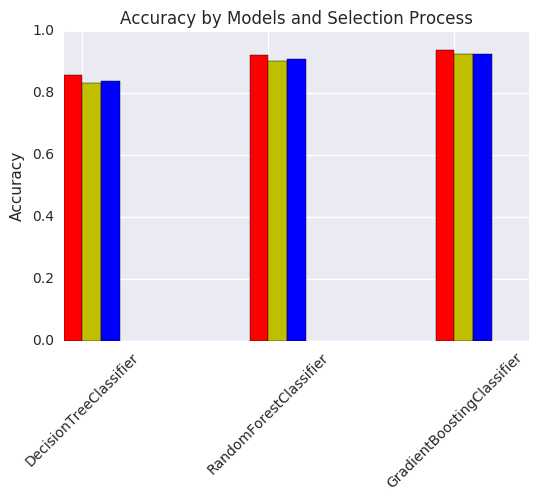

In [26]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind =  np.arange(3)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Out_Accuracy_1, width, color='r')
rects2 = ax.bar(ind + width, Out_Accuracy_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Out_Accuracy_3, width, color='b')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=45)
plt.show()

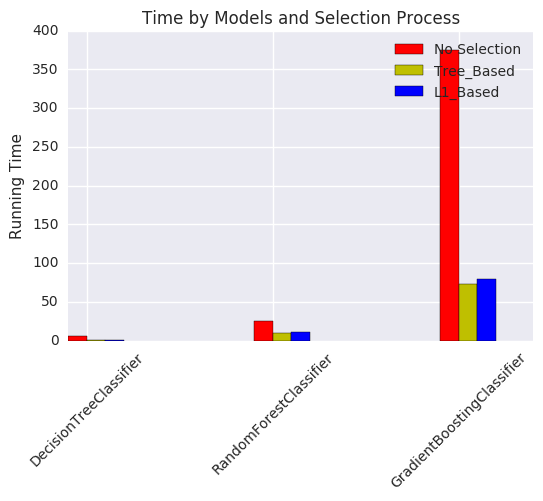

In [27]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind =  np.arange(3)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Time_1, width, color='r')
rects2 = ax.bar(ind + width, Time_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Time_3, width, color='b')
ax.set_ylabel('Running Time')
ax.set_title('Time by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=45)
ax.legend((rects1[0], rects2[0],rects3[0]), ('No Selection', 'Tree_Based','L1_Based'))
plt.show()

In [19]:
import seaborn as sns
sns.set()
planets = sns.load_dataset('planets')
planets.head()


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


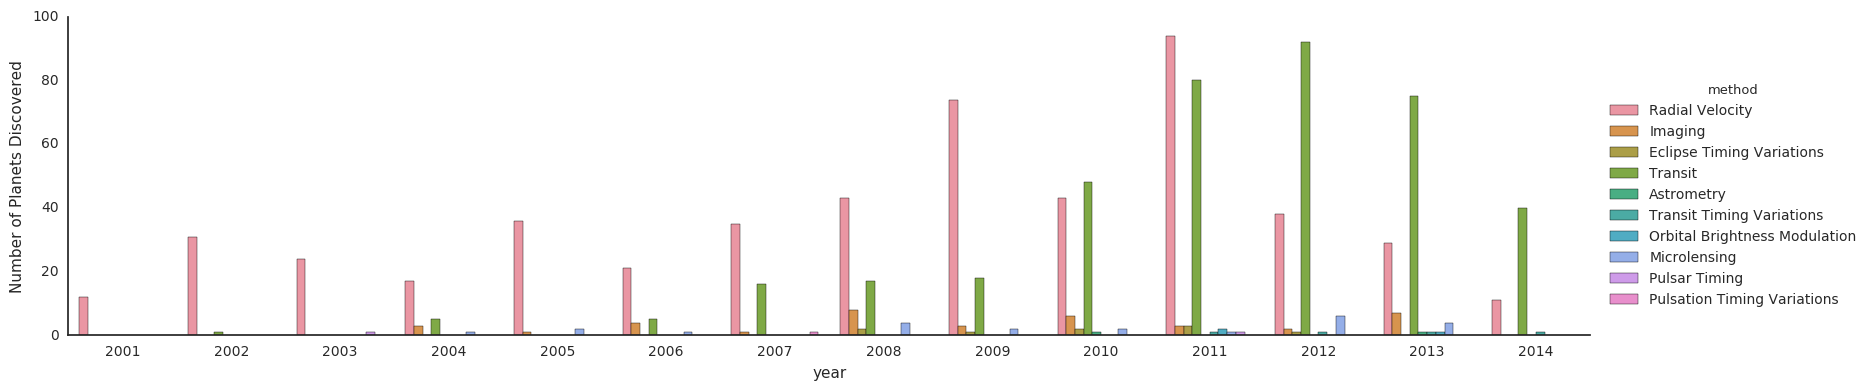

In [22]:
with sns.axes_style('white'):
            g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                               hue='method', order=range(2001, 2015))
            g.set_ylabels('Number of Planets Discovered')

#### Running Time

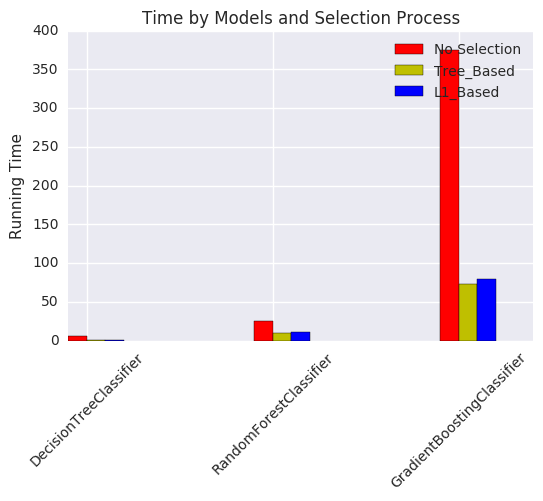

In [24]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
ind =  np.arange(3)   # the x locations for the groups
width = 0.1       # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(ind, Time_1, width, color='r')
rects2 = ax.bar(ind + width, Time_2, width, color='y')
rects3 = ax.bar(ind + width + width ,Time_3, width, color='b')
ax.set_ylabel('Running Time')
ax.set_title('Time by Models and Selection Process')
ax.set_xticks(ind + width)
ax.set_xticklabels(Model_3,rotation=45)
ax.legend((rects1[0], rects2[0],rects3[0]), ('No Selection', 'Tree_Based','L1_Based'))
plt.show()

### Summary